# Sarcasm Detection with Bidirectional LSTM

### Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,layers
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re

### Read 'Data.csv'

In [2]:
df=pd.read_csv('Data.csv')

In [3]:
df.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",Sarcastic
2,New Emails Reveal Warm Relationship Between Ka...,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,Non Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic


### Print some of the Headlines along with the target

In [4]:
for i in range(10):
    print(df['headlines'][i])
    print()

CNN Triumphs (At Least in Most Demographic Categories)

‘You Did The Best You Could,’ Says Iron Man Action Figure Voiced By Despondent Toys ‘R’ Us CEO Packing Up Office

New Emails Reveal Warm Relationship Between Kamala Harris And Big Tech

Donald Trump Jr. Gets Slammed Over Racist Birtherism Bot Attack On Kamala Harris

God Urges Rick Perry Not To Run For President

Global Aid Pours into Haiti

CNN Anchor Calls Obama Protester 'Rude' And 'Crazy'

Federal Prisons Reinstitute Executions By Lethal Inflation

Lou Dobbs Crumbles When Pressed On His 'NAFTA Super Highway' Myth

CNN Still Bent On Debating 'Two Sides' Of The Confederacy



### Check Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12506 entries, 0 to 12505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  12506 non-null  object
 1   target     12506 non-null  object
dtypes: object(2)
memory usage: 195.5+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,headlines,target
count,12506,12506
unique,12506,2
top,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
freq,1,6531


### Check for missing values

In [6]:
df.isna().sum()

headlines    0
target       0
dtype: int64

### Check for duplicates

In [7]:
df.duplicated().sum()

0

### Plot a countplot of the Class Index

<Axes: xlabel='count', ylabel='target'>

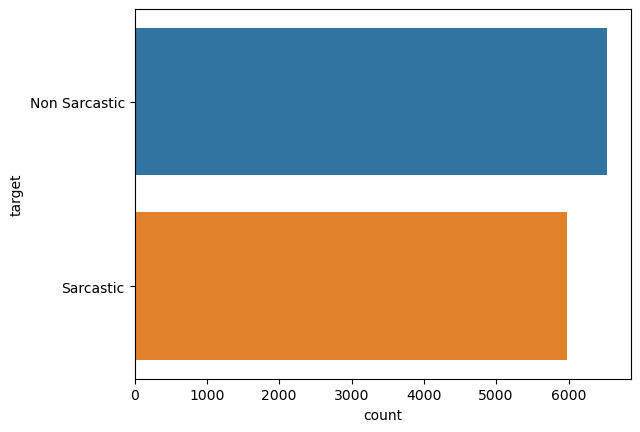

In [8]:
sns.countplot(y=df['target'])

### Create a funciton to preprocess the text

In [9]:
def prepro(sent):
    sent=sent.lower()
    text=re.sub(r'[^0-9a-zA-Z]',' ',sent).split()
    lem=WordNetLemmatizer()
    text=[lem.lemmatize(i) for i in text]
    return ' '.join(text)

### Apply the preprocess function to the description

In [10]:
df['headlines']=df['headlines'].apply(prepro)

In [11]:
for i in range(10):
    print(df['headlines'][i])
    print()

cnn triumph at least in most demographic category

you did the best you could say iron man action figure voiced by despondent toy r u ceo packing up office

new email reveal warm relationship between kamala harris and big tech

donald trump jr get slammed over racist birtherism bot attack on kamala harris

god urge rick perry not to run for president

global aid pours into haiti

cnn anchor call obama protester rude and crazy

federal prison reinstitute execution by lethal inflation

lou dobbs crumbles when pressed on his nafta super highway myth

cnn still bent on debating two side of the confederacy



### Split Input & Target Variables

In [12]:
X=df['headlines']
y=df['target']

### One Hot encode our Target Variable

In [13]:
y.unique()

array(['Non Sarcastic', 'Sarcastic'], dtype=object)

In [14]:
y=y.map({'Non Sarcastic':0,'Sarcastic':1})

In [15]:
y

0        0
1        1
2        0
3        0
4        1
        ..
12501    0
12502    1
12503    1
12504    0
12505    1
Name: target, Length: 12506, dtype: int64

### Split the dataset into Training & Testing Set

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Create a keras Tokenizer object

In the Keras library, the Tokenizer is a class that can be used to preprocess text data. It allows you to convert a collection of text documents into a numerical representation that can be used as input to a machine learning model.

In [21]:
token=Tokenizer(num_words=5000)


### fit on text for our X

In [22]:
token.fit_on_texts(X)
vocab_size=len(token.word_index)+1

In [23]:
vocab_size

15411

### Create a function to convert text to numerical representation and add padding

In [20]:
def encoder(txt):
    enco=token.texts_to_sequences(txt)
    padd=pad_sequences(enco,maxlen=128)
    return padd

### Apply the function to our X_train & X_test

In [21]:
X_train=encoder(X_train)
X_test=encoder(X_test)

### Create keras Sequential model with GRU Layers

In [22]:
model=Sequential()
model.add(layers.Embedding(vocab_size,128))
model.add(layers.Bidirectional(layers.LSTM(128,return_sequences=True)))
model.add(layers.Dropout(0.2))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1972608   
                                                                 
 bidirectional (Bidirection  (None, None, 256)         263168    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

### Compile the model

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model with our Training Set

In [25]:
model.fit(X_train, y_train, epochs = 10, validation_split=0.05)

Epoch 1/10
297/297 [==============================] - 227s 741ms/step - loss: 0.3120 - accuracy: 0.8600 - val_loss: 0.2383 - val_accuracy: 0.9082
Epoch 2/10
297/297 [==============================] - 182s 612ms/step - loss: 0.1468 - accuracy: 0.9478 - val_loss: 0.2747 - val_accuracy: 0.9002
Epoch 3/10
297/297 [==============================] - 179s 604ms/step - loss: 0.0875 - accuracy: 0.9702 - val_loss: 0.2664 - val_accuracy: 0.8942
Epoch 4/10
297/297 [==============================] - 187s 628ms/step - loss: 0.0492 - accuracy: 0.9825 - val_loss: 0.3494 - val_accuracy: 0.9022
Epoch 5/10
297/297 [==============================] - 186s 628ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.4656 - val_accuracy: 0.8782
Epoch 6/10
297/297 [==============================] - 203s 683ms/step - loss: 0.0177 - accuracy: 0.9957 - val_loss: 0.4607 - val_accuracy: 0.8723
Epoch 7/10
297/297 [==============================] - 183s 615ms/step - loss: 0.0162 - accuracy: 0.9942 - val_loss: 0.5214 -

### Make predictions with Test set

In [26]:
y_pred=model.predict(X_test)

79/79 [==============================] - 13s 147ms/step


In [32]:
y_pred=[np.argmax(i) for i in y_pred]


In [37]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [30]:
y_test

5015    1
3173    1
8121    0
8365    1
9349    1
       ..
501     0
153     0
8444    1
6096    0
618     0
Name: target, Length: 2502, dtype: int64

### Check accuracy score

In [33]:
metrics.accuracy_score(y_test,y_pred)

0.5199840127897681

### Confusion matrix

<Axes: >

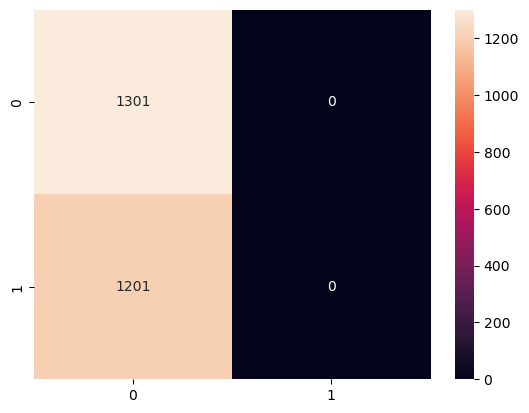

In [36]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Classification Report

In [38]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1301
           1       0.00      0.00      0.00      1201

    accuracy                           0.52      2502
   macro avg       0.26      0.50      0.34      2502
weighted avg       0.27      0.52      0.36      2502



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***